In [20]:
import sys
from pathlib import Path
from torchvision import datasets
import sys

In [21]:
sys.path.append("D:/Unlearning")
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [22]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from methods.naive.naive_utils import init_dataloaders
from utils.train_test_metrics import plot_training_history
from utils.train_test_metrics import test_model
from utils.train_test_metrics import show_metrics
from models.effnetb0 import init_model_effnetb0
from methods.naive.naive_utils import recreate_dataloaders

Device used: cuda


In [23]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 3

In [24]:
model, model_name, criterion, optimizer, transform = init_model_effnetb0(
    learning_rate=LEARNING_RATE, fc_output=3
)

Init model...
Done initializing model.
Model ID: 1487597756688, Optimizer ID: 1487597751408, Criterion ID: 1487597755440


In [25]:
results_path = Path("D:/Unlearning/results/animal_faces/naive")

In [26]:
train_dataset = datasets.ImageFolder(root=data_root / "afhq/train", transform=transform)
test_dataset = datasets.ImageFolder(root=data_root / "afhq/val", transform=transform)
data_split_path = results_path / "afhq_data_splits.json"

train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=data_split_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


## Plot history losses


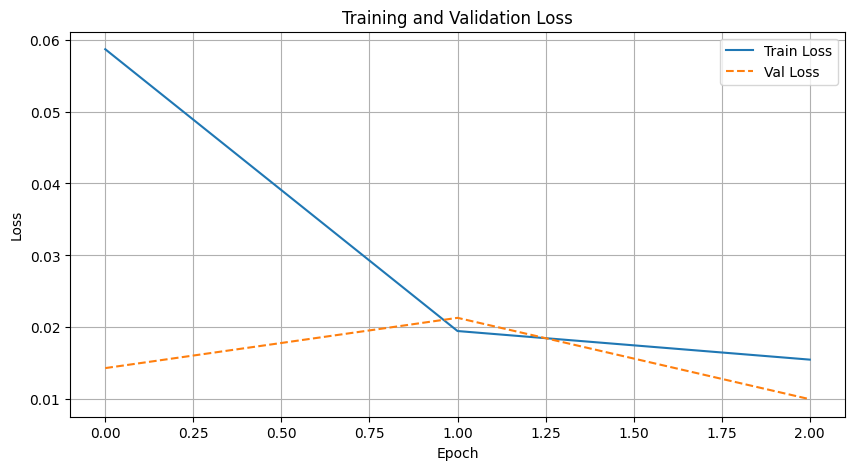

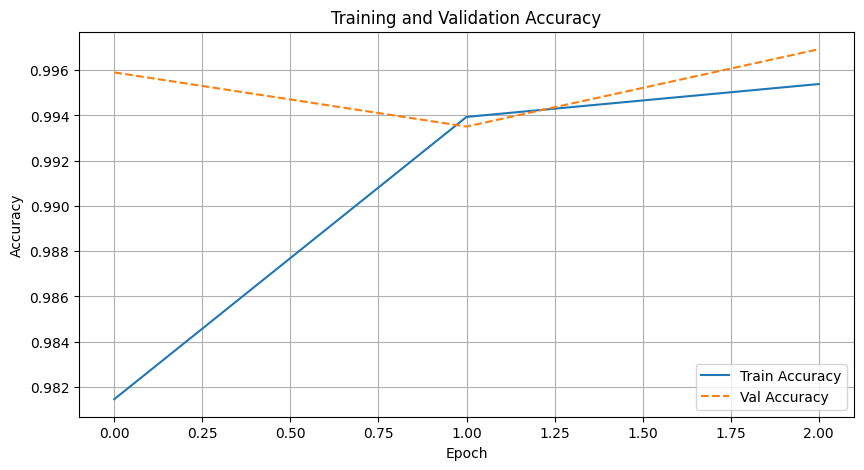

In [27]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

## Call test


In [28]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path)

Loading and testing model: EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\naive\EffNetB0_AFHQ_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.42it/s]

Predictions and labels saved to EffNetB0_AFHQ_predictions.json


Metrics for EffNetB0_AFHQ:
  - Test Accuracy: 0.9980
  - Precision: 0.9980
  - Recall: 0.9980
  - F1 Score: 0.9980


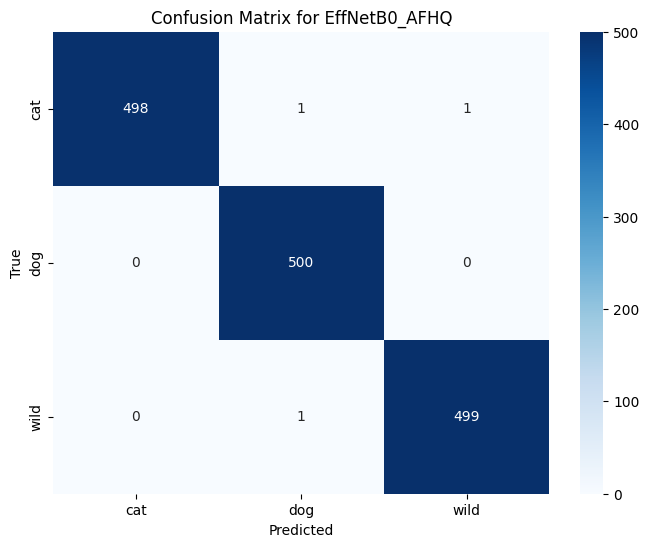

In [29]:
predictions_path = results_path / f"{model_name}_predictions.json"
# classes = ['cat', 'dog', 'wildlife']
show_metrics(predictions_path, classes, model_name)

# Naive unlearning results

In [30]:
updated_data_splits_path = results_path / "updated_afhq_data_splits.json"
model_name = "naive_unlearning_" + model_name

In [31]:
train_dataset = datasets.ImageFolder(root=data_root / "afhq/train", transform=transform)
test_dataset = datasets.ImageFolder(root=data_root / "afhq/val", transform=transform)

In [32]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


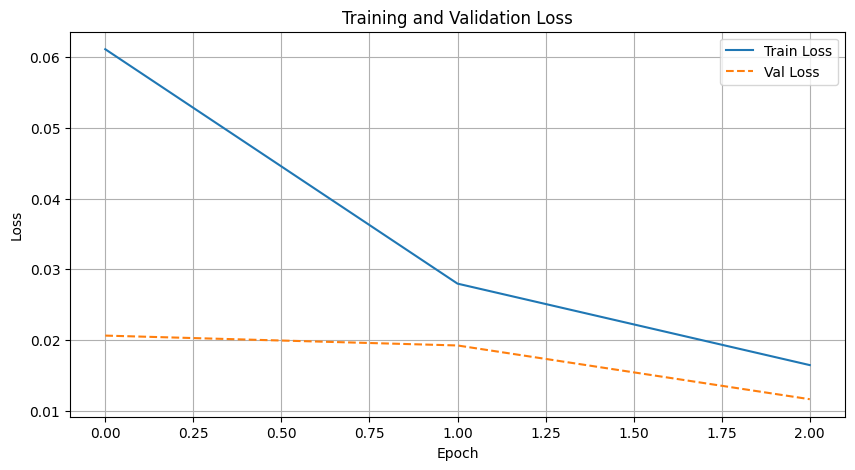

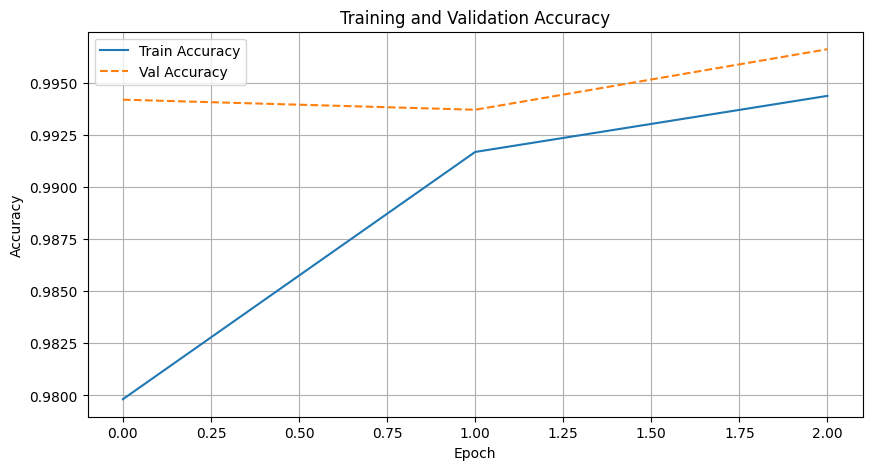

In [33]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

In [34]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path=results_path)

Loading and testing model: naive_unlearning_EffNetB0_AFHQ


Evaluating model: D:\Unlearning\results\animal_faces\naive\naive_unlearning_EffNetB0_AFHQ_model.pth: 100%|██████████| 24/24 [00:09<00:00,  2.41it/s]

Predictions and labels saved to naive_unlearning_EffNetB0_AFHQ_predictions.json


Metrics for naive_unlearning_EffNetB0_AFHQ:
  - Test Accuracy: 0.9953
  - Precision: 0.9954
  - Recall: 0.9953
  - F1 Score: 0.9953


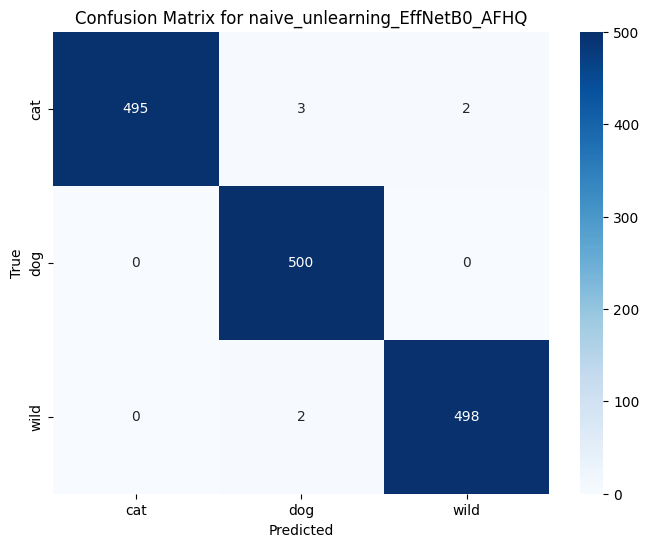

In [35]:
predictions_path = results_path / f"{model_name}_predictions.json"
# classes = ['cat', 'dog', 'wildlife']
show_metrics(predictions_path, classes, model_name)